<a href="https://colab.research.google.com/github/itzem-vg/Practicos-SIS420-COM200/blob/main/LAB2/Lab_02-VelasquezGuerra_ItzelEmily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [252]:
#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [253]:
# Conectamos nuestro Drive al Colab
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# ***1. MULTIVARIABLE***

In [254]:
# Cargar datos desde un archivo con el formato especificado
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/datasetLab2.1.csv', delimiter=",")
print(data)

print('-' * 100) #separaador
# Mostrar la cantidad de filas en los datos
print("Cantidad de filas:", len(data))


        popularity  duration_ms  danceability  energy  key  loudness  \
0               73       230666         0.676  0.4610    1    -6.746   
1               55       149610         0.420  0.1660    1   -17.235   
2               57       210826         0.438  0.3590    0    -9.734   
3               71       201933         0.266  0.0596    0   -18.515   
4               82       198853         0.618  0.4430    2    -9.681   
...            ...          ...           ...     ...  ...       ...   
113995          21       384999         0.172  0.2350    5   -16.393   
113996          22       385000         0.174  0.1170    0   -18.318   
113997          22       271466         0.629  0.3290    0   -10.895   
113998          41       283893         0.587  0.5060    7   -10.889   
113999          22       241826         0.526  0.4870    1   -10.204   

        speechiness  acousticness  liveness  valence    tempo  time_signature  
0            0.1430        0.0322    0.3580   0.7150   

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   popularity      114000 non-null  int64  
 1   duration_ms     114000 non-null  int64  
 2   danceability    114000 non-null  float64
 3   energy          114000 non-null  float64
 4   key             114000 non-null  int64  
 5   loudness        114000 non-null  float64
 6   speechiness     114000 non-null  float64
 7   acousticness    114000 non-null  float64
 8   liveness        114000 non-null  float64
 9   valence         114000 non-null  float64
 10  tempo           114000 non-null  float64
 11  time_signature  114000 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 10.4 MB


In [267]:
train_dataset, test_dataset = train_test_split(data, test_size=0.2, random_state=42) #test_size=0.2 el 20% de los datos originales se asignarán al conjunto de prueba, dejando el 80% restante para el conjunto de entrenamiento.


#prepara las variables independientes para que el modelo de regresión utilizando los datos de prueba.
X_regre_test = test_dataset.drop(['danceability'], axis=1).values
y_regre_test = test_dataset['danceability'].values

In [257]:
# Seleccionamos las columnas para X y la columna 'danceability' para y
X_regre = train_dataset.drop(['danceability'], axis=1).values
y_regre = train_dataset['danceability'].values
m_regre = len(y_regre) # almacenará el número de ejemplos que se utilizarán para entrenar tu modelo de regresión.



# Ahora, X y y deberían contener datos numéricos del 80% del dataset

# imprimir todos las X de datos solo 10
# Ajustamos la cadena de formato para que coincida con el número de columnas en X_regre
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 115)  # Separador

for i in range(10):
    # Ajustamos la cadena de formato y eliminamos el acceso a índices más allá del rango válido
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:10.0f}'.format(
        X_regre[i, 0], X_regre[i, 1], X_regre[i, 2], X_regre[i, 3], X_regre[i, 4], X_regre[i, 5],
        X_regre[i, 6], X_regre[i, 7], X_regre[i, 8], X_regre[i, 9], X_regre[i, 10], y_regre[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
-------------------------------------------------------------------------------------------------------------------
      28  293960         1         9     -11       0       0       0       1        97       4         1
       1  147133         1         7      -6       0       0       0       0        92       4         1
      11   98386         0         9     -17       1       1       0       1       110       4         1
      61  232173         1         0      -6       0       0       1       1       138       4         1
      37  360320         1         0      -7       0       1       0       1       104       4         1
      26  213000         1         0      -7       0       0       0       1       150       4         1
      23  149506         0        10     -14       0       1       0       0       110       3         0
      55  155492         1         1      -

In [258]:
# Mostrar primeros 20 datos
print("Mostramos solo 20 datos")
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}'.format('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12')) # Quitamos X13 e Y del encabezado
print('-'*108) #  separador
for i in range(20):  # Mostrar solo los primeros 20 datos
    # Usamos .iloc para indexar el DataFrame de Pandas
    print('{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:10.1f}{:10.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}'.format(*data.iloc[i,:12])) # Imprimimos solo las primeras 12 columnas

Mostramos solo 20 datos
      X1      X2      X3      X4      X5      X6        X7        X8      X9     X10     X11     X12
------------------------------------------------------------------------------------------------------------
    73.0230666.0     0.7     0.5     1.0    -6.7       0.1       0.0     0.4     0.7    87.9     4.0
    55.0149610.0     0.4     0.2     1.0   -17.2       0.1       0.9     0.1     0.3    77.5     4.0
    57.0210826.0     0.4     0.4     0.0    -9.7       0.1       0.2     0.1     0.1    76.3     4.0
    71.0201933.0     0.3     0.1     0.0   -18.5       0.0       0.9     0.1     0.1   181.7     3.0
    82.0198853.0     0.6     0.4     2.0    -9.7       0.1       0.5     0.1     0.2   119.9     4.0
    58.0214240.0     0.7     0.5     6.0    -8.8       0.1       0.3     0.2     0.7    98.0     4.0
    74.0229400.0     0.4     0.1     2.0    -8.8       0.0       0.9     0.1     0.1   141.3     3.0
    80.0242946.0     0.7     0.4    11.0    -9.3       0.0 

In [259]:
#data.info()

# ***1.1 Normalización de caracteristicas***
Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

In [260]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [261]:
# Separar las características (X) de la variable objetivo (Y)
X = data.iloc[:11000, 2:]
y = data.iloc[:11000, 0]

m = len(X)
# Mostrar la cantidad de filas en los datos
print("Cantidad de filas:",m )

Cantidad de filas: 11000


In [262]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

# Mostrar algunos puntos de datos normalizados
print("Mostramos solo 10 datos normalizados")
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}'.format('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12')) # Quitamos 'Y'
print('-'*107) # Ajustamos la longitud de la línea
for i in range(10):  # Mostrar solo los primeros 10 datos normalizados

    print('{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:10.4f}{:10.4f}{:8.4f}{:8.4f}'.format(

        X_norm.iloc[i, 0], X_norm.iloc[i, 1], X_norm.iloc[i, 2], X_norm.iloc[i, 3],
        X_norm.iloc[i, 4], X_norm.iloc[i, 5], X_norm.iloc[i, 6], X_norm.iloc[i, 7],
        X_norm.iloc[i, 8], X_norm.iloc[i, 9]
    )) # Usamos .iloc para indexación basada en etiquetas y quitamos la última columna
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)

Mostramos solo 10 datos normalizados
      X1      X2      X3      X4      X5      X6        X7        X8      X9     X10     X11
-----------------------------------------------------------------------------------------------------------
  0.8455 -0.6529 -1.2472  0.3515  1.0987 -0.8323    0.8499    0.9284 -1.1564  0.2473
 -0.6349 -1.7599 -1.2472 -1.6320  0.1128  1.7650   -0.5778   -0.7346 -1.5060  0.2473
 -0.5308 -1.0356 -1.5291 -0.2136 -0.1917 -0.3145   -0.4889   -1.2803 -1.5448  0.2473
 -1.5255 -2.1591 -1.5291 -1.8741 -0.4785  1.7096   -0.4056   -1.1949  1.9895 -2.1325
  0.5101 -0.7204 -0.9653 -0.2035 -0.2375  0.4398   -0.6784   -1.1058 -0.0823  0.2473
  0.9149 -0.5778  0.1623 -0.0383  0.5370 -0.0844   -0.0890    0.7465 -0.8177  0.2473
 -0.7101 -1.8312 -0.9653 -0.0411 -0.4903  1.5698   -0.6317   -1.4417  0.6330 -2.1325
  1.0016 -0.7166  1.5717 -0.1374 -0.3986  0.7020   -0.5984    0.9173  0.9575  0.2473
  0.5506 -0.8292 -1.5291 -0.0180 -0.4696 -0.0698   -0.3001    0.7577  0.2576  0.24

Añadimos fila X0 de puros unos (1)

In [263]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
# Asegúrate de que X_norm tenga las mismas filas que la columna de unos
X_norm = X_norm.iloc[:m, :]
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.          0.84548148 -0.65285138 ...  0.92841141 -1.15635129
   0.2472859 ]
 [ 1.         -0.63490778 -1.75986854 ... -0.73459351 -1.50599907
   0.2472859 ]
 [ 1.         -0.53081791 -1.03561663 ... -1.280267   -1.54479294
   0.2472859 ]
 ...
 [ 1.          1.18088218  0.97952986 ... -0.21490448 -1.17026612
   0.2472859 ]
 [ 1.          0.39442538  1.14464429 ...  0.03009178  1.76395205
   0.2472859 ]
 [ 1.          0.68356391  0.39037158 ...  1.07318192  0.10560628
   0.2472859 ]]


In [264]:
print(X.shape)

(11000, 11)


# ***1.2 Descenso por el gradiente***


In [265]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # hipotesis o y predicha
    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [266]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # alfa => coeficiente de aprendizaje

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * np.dot(X.T, np.dot(X, theta) - y)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

# ***1.3 Seleccionando coheficientes de aprendizaje***


theta calculado por el descenso por el gradiente: [32.93009084  0.33264583 -5.15387144 -0.42656694  1.85630151  0.10742305
 -0.4189311   0.27967743 -2.72741486 -0.07608133  0.5152187 ]


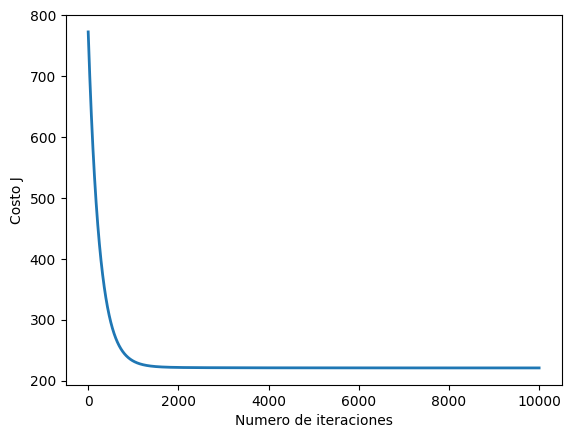

In [223]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.002 # alpha = 0.003
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [224]:
# Datos para predecir (solo 11 columnas) AUMENTAR
data_new = np.array([
    [1, 0, 33, 20, 13, 46, 23, 1022.9, 1019.8, 0, 0],
    [1, 0, 28, 13, 11, 38, 19, 1020.4, 1015.2, 0, 0],
    [1, 0, 44, 9, 30, 47, 15, 1013.9, 1009.3, 0, 0],
    [1, 0, 54, 9, 7, 62, 93, 1004, 1002.3, 1, 8],
    [1, 29.4, 56, 20, 28, 90, 60, 1000.8, 1001.3, 8, 6]
])

print("Shape of theta:", theta.shape)
print("Shape of data_new:", data_new.shape)

Shape of theta: (11,)
Shape of data_new: (5, 11)


In [225]:
# Calcula el número de coeficientes faltantes
num_missing_coeffs = data_new.shape[1] - theta.shape[0]

# Agrega los coeficientes faltantes a theta
theta = np.pad(theta, (0, num_missing_coeffs), 'constant')

# Ahora realiza el producto punto
y_pred = np.dot(data_new, theta)


print("Shape of theta:", theta.shape)
print("Shape of data_new:", data_new.shape)

Shape of theta: (11,)
Shape of data_new: (5, 11)


In [226]:
# Visualizar las predicciones
print('Predicciones de su bailabilidad máxima para las nuevas características:')
for i, pred in enumerate(y_pred, start=1):
    print(f'Predicción {i}: {pred.round(2)}')

Predicciones de su bailabilidad máxima para las nuevas características:
Predicción 1: -2621.58
Predicción 2: -2583.87
Predicción 3: -2612.44
Predicción 4: -2717.37
Predicción 5: -2666.51


In [227]:
data_new = np.array([
    [1, 0, 33, 20, 13, 46, 23, 1022.9, 1019.8, 0, 0],
    [1, 0, 28, 13, 11, 38, 19, 1020.4, 1015.2, 0, 0],
    [1, 0, 44, 9, 30, 47, 15, 1013.9, 1009.3, 0, 0],
    [1, 0, 54, 9, 7, 62, 93, 1004, 1002.3, 1, 8],
    [1, 29.4, 56, 20, 28, 90, 60, 1000.8, 1001.3, 8, 6]
])

# Calcular las predicciones
y_pred = np.dot(data_new, theta)

# Visualizar las predicciones
print('Predicciones de bailabilidad máxima para las nuevas características:')
for i, pred in enumerate(y_pred, start=1):
    print(f'Predicción {i}: {pred.round(2)}')

Predicciones de bailabilidad máxima para las nuevas características:
Predicción 1: -2621.58
Predicción 2: -2583.87
Predicción 3: -2612.44
Predicción 4: -2717.37
Predicción 5: -2666.51


# ***2. POLINOMIAL***

In [228]:
# Cargar datos desde un archivo con el formato especificado
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/datasetLab2.1.csv', delimiter=",")
print(data)

print('-' * 100) #separaador
# Mostrar la cantidad de filas en los datos
print("Cantidad de filas:", len(data))

        popularity  duration_ms  danceability  energy  key  loudness  \
0               73       230666         0.676  0.4610    1    -6.746   
1               55       149610         0.420  0.1660    1   -17.235   
2               57       210826         0.438  0.3590    0    -9.734   
3               71       201933         0.266  0.0596    0   -18.515   
4               82       198853         0.618  0.4430    2    -9.681   
...            ...          ...           ...     ...  ...       ...   
113995          21       384999         0.172  0.2350    5   -16.393   
113996          22       385000         0.174  0.1170    0   -18.318   
113997          22       271466         0.629  0.3290    0   -10.895   
113998          41       283893         0.587  0.5060    7   -10.889   
113999          22       241826         0.526  0.4870    1   -10.204   

        speechiness  acousticness  liveness  valence    tempo  time_signature  
0            0.1430        0.0322    0.3580   0.7150   

In [229]:
# Seleccionamos las columnas para X y la columna 'price' para y
X_regre = train_dataset.drop(['danceability'], axis=1).values
y_regre = train_dataset['danceability'].values
m_regre = len(y_regre) # almacenará el número de ejemplos que se utilizarán para entrenar tu modelo de regresión.



# Ahora, X y y deberían contener datos numéricos del 80% del dataset

# imprimir todos las X de datos solo 10
# Ajustamos la cadena de formato para que coincida con el número de columnas en X_regre
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 115)  # Ajustamos la longitud del separador

for i in range(10):
    # Ajustamos la cadena de formato y eliminamos el acceso a índices más allá del rango válido
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:10.0f}'.format(
        X_regre[i, 0], X_regre[i, 1], X_regre[i, 2], X_regre[i, 3], X_regre[i, 4], X_regre[i, 5],
        X_regre[i, 6], X_regre[i, 7], X_regre[i, 8], X_regre[i, 9], X_regre[i, 10], y_regre[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
-------------------------------------------------------------------------------------------------------------------
      28  293960         1         9     -11       0       0       0       1        97       4         1
       1  147133         1         7      -6       0       0       0       0        92       4         1
      11   98386         0         9     -17       1       1       0       1       110       4         1
      61  232173         1         0      -6       0       0       1       1       138       4         1
      37  360320         1         0      -7       0       1       0       1       104       4         1
      26  213000         1         0      -7       0       0       0       1       150       4         1
      23  149506         0        10     -14       0       1       0       0       110       3         0
      55  155492         1         1      -

--------------------------------------------------------------------------------

In [230]:
# Separar las características (X) de la variable objetivo (Y)
X = data.iloc[:11000, 2:]
y = data.iloc[:11000, 0]

m = len(X)
# Mostrar la cantidad de filas en los datos
print("Cantidad de filas:",m )

Cantidad de filas: 11000


In [231]:
print(X)

       danceability  energy  key  loudness  speechiness  acousticness  \
0             0.676  0.4610    1    -6.746       0.1430      0.032200   
1             0.420  0.1660    1   -17.235       0.0763      0.924000   
2             0.438  0.3590    0    -9.734       0.0557      0.210000   
3             0.266  0.0596    0   -18.515       0.0363      0.905000   
4             0.618  0.4430    2    -9.681       0.0526      0.469000   
...             ...     ...  ...       ...          ...           ...   
10995         0.624  0.9720   11    -5.689       0.0677      0.007890   
10996         0.718  0.9460    7    -4.516       0.0686      0.001950   
10997         0.734  0.8960    2    -3.572       0.0412      0.004060   
10998         0.598  0.9400   10    -2.479       0.0562      0.001100   
10999         0.648  0.7390    8   -11.031       0.0292      0.000156   

       liveness  valence    tempo  time_signature  
0        0.3580    0.715   87.917               4  
1        0.1010    

In [240]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

# Mostrar algunos puntos de datos normalizados
print("Mostramos solo 10 datos normalizados")
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}'.format('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11')) # Quitamos 'Y'
print('-'*107) # Ajustamos la longitud de la línea
for i in range(10):  # Mostrar solo los primeros 10 datos normalizados

    print('{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:10.4f}{:10.4f}{:8.4f}{:8.4f}'.format(

        X_norm.iloc[i, 0], X_norm.iloc[i, 1], X_norm.iloc[i, 2], X_norm.iloc[i, 3],
        X_norm.iloc[i, 4], X_norm.iloc[i, 5], X_norm.iloc[i, 6], X_norm.iloc[i, 7],
        X_norm.iloc[i, 8], X_norm.iloc[i, 9]
    )) # Usamos .iloc para indexar por posición en lugar de etiquetas
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)

Mostramos solo 10 datos normalizados
      X1      X2      X3      X4      X5      X6        X7        X8      X9     X10     X11
-----------------------------------------------------------------------------------------------------------
  0.8455 -0.6529 -1.2472  0.3515  1.0987 -0.8323    0.8499    0.9284 -1.1564  0.2473
 -0.6349 -1.7599 -1.2472 -1.6320  0.1128  1.7650   -0.5778   -0.7346 -1.5060  0.2473
 -0.5308 -1.0356 -1.5291 -0.2136 -0.1917 -0.3145   -0.4889   -1.2803 -1.5448  0.2473
 -1.5255 -2.1591 -1.5291 -1.8741 -0.4785  1.7096   -0.4056   -1.1949  1.9895 -2.1325
  0.5101 -0.7204 -0.9653 -0.2035 -0.2375  0.4398   -0.6784   -1.1058 -0.0823  0.2473
  0.9149 -0.5778  0.1623 -0.0383  0.5370 -0.0844   -0.0890    0.7465 -0.8177  0.2473
 -0.7101 -1.8312 -0.9653 -0.0411 -0.4903  1.5698   -0.6317   -1.4417  0.6330 -2.1325
  1.0016 -0.7166  1.5717 -0.1374 -0.3986  0.7020   -0.5984    0.9173  0.9575  0.2473
  0.5506 -0.8292 -1.5291 -0.0180 -0.4696 -0.0698   -0.3001    0.7577  0.2576  0.24

In [241]:
def plotData(x, y):
  # Grafica los puntos x e y en una figura nueva
  fig = plt.figure() # abre una nueva figura

  plt.plot(x, y, 'ro', ms=10, mec='k')
  plt.xlabel('Información por minutos')
  plt.ylabel('temperaturasMax')


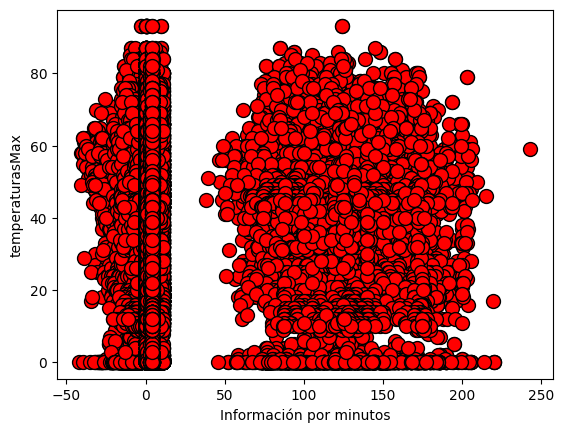

In [242]:
plotData(X, y)

In [243]:
def featureNormalize(X):
  X_norm = X.copy()
  mu = np.zeros(X.shape[1]) # promedio, media
  sigma = np.zeros(X.shape[1])  # desviasión estandar

  mu = np.mean(X, axis=0)
  sigma = np.std(X, axis=0)
  X_norm = (X - mu) / sigma

  return X_norm, mu, sigma

In [244]:
# Llamar a la funcion de normalización con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [245]:
# Columna de unos para X0

X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

print(X)

[[ 1.          0.84548148 -0.65285138 ...  0.92841141 -1.15635129
   0.2472859 ]
 [ 1.         -0.63490778 -1.75986854 ... -0.73459351 -1.50599907
   0.2472859 ]
 [ 1.         -0.53081791 -1.03561663 ... -1.280267   -1.54479294
   0.2472859 ]
 ...
 [ 1.          1.18088218  0.97952986 ... -0.21490448 -1.17026612
   0.2472859 ]
 [ 1.          0.39442538  1.14464429 ...  0.03009178  1.76395205
   0.2472859 ]
 [ 1.          0.68356391  0.39037158 ...  1.07318192  0.10560628
   0.2472859 ]]


# ***2.2 Descenso por el gradiente***

In [246]:
# Declaramos la funcion de costo

def computeCostMulti(X, y, theta):
  # Inicializamos el número de ejemplos de entrenamiento
  m = y.shape[0]

  J = 0
  h = np.dot(X, theta)

  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

  return J

In [247]:
# Declaramos la función el descenso por el gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iter):

  m = y.shape[0]
  theta = theta.copy()
  J_history = [] # historial de costo

  for i in range(num_iter):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_history.append(computeCostMulti(X, y, theta))

  return theta, J_history


# ***2.3 Seleccionando coheficientes de aprendizaje***

In [248]:
def gradientDescentMulti(X, y, theta, alpha, num_iter):

  m = y.shape[0]
  theta = theta.copy()
  J_history = [] # historial de costo

  for i in range(num_iter):
    # Transpose X to align dimensions for dot product
    theta = theta - (alpha / m) * np.dot(X.T, (np.dot(X, theta) - y))
    J_history.append(computeCostMulti(X, y, theta))

  return theta, J_history

In [249]:
# Datos para predecir (solo 11 columnas) AUMENTAR
data_new = np.array([
    [1, 0, 33, 20, 13, 46, 23, 1022.9, 1019.8, 0, 0],
    [1, 0, 28, 13, 11, 38, 19, 1020.4, 1015.2, 0, 0],
    [1, 0, 44, 9, 30, 47, 15, 1013.9, 1009.3, 0, 0],
    [1, 0, 54, 9, 7, 62, 93, 1004, 1002.3, 1, 8],
    [1, 29.4, 56, 20, 28, 90, 60, 1000.8, 1001.3, 8, 6]
])

# La cantidad de funciones en data_new coincida con la longitud de theta
# Ajuste el número de ceros añadidos según sea necesario
data_new_with_all_features = np.hstack((data_new, np.zeros((data_new.shape[0], 3))))

print("Shape of theta:", theta.shape)
print("Shape of data_new_with_all_features:", data_new_with_all_features.shape)



Shape of theta: (14, 1)
Shape of data_new_with_all_features: (5, 14)


In [250]:
#Calcula el número de coeficientes faltantes
num_missing_coeffs = theta.shape[0] - data_new.shape[1]  # Changed the order of subtraction

#Agrega los coeficientes faltantes a data_new (en lugar de theta) si es necesario
if num_missing_coeffs > 0:
    data_new = np.pad(data_new, ((0, 0), (0, num_missing_coeffs)), 'constant')

#Ahora realiza el producto punto
y_pred = np.dot(data_new, theta)

In [234]:
print("Shape of theta:", theta.shape)
print("Shape of data_new_with_all_features:", data_new_with_all_features.shape)

Shape of theta: (11,)
Shape of data_new_with_all_features: (5, 14)


In [238]:
# Calcula el número de coeficientes faltantes
num_missing_coeffs = 14 - theta.shape[0]

# Agrega los coeficientes faltantes a theta
theta = np.pad(theta, (0, num_missing_coeffs), 'constant')

# Ahora cambia la forma de theta
theta = theta.reshape((14, 1))
#print(theta)

print("Shape of theta:", theta.shape)
print("Shape of data_new_with_all_features:", data_new_with_all_features.shape)

Shape of theta: (14, 1)
Shape of data_new_with_all_features: (5, 14)


In [239]:
# Datos para predecir (solo 11 columnas) AUMENTAR
data_new = np.array([
    [1, 0, 33, 20, 13, 46, 23, 1022.9, 1019.8, 0, 0],
    [1, 0, 28, 13, 11, 38, 19, 1020.4, 1015.2, 0, 0],
    [1, 0, 44, 9, 30, 47, 15, 1013.9, 1009.3, 0, 0],
    [1, 0, 54, 9, 7, 62, 93, 1004, 1002.3, 1, 8],
    [1, 29.4, 56, 20, 28, 90, 60, 1000.8, 1001.3, 8, 6]
])

data_new_with_all_features = np.hstack((data_new, np.zeros((data_new.shape[0], 3))))

print("Shape of theta:", theta.shape)
print("Shape of data_new_with_all_features:", data_new_with_all_features.shape)

# Calcular las predicciones
y_pred = np.dot(data_new_with_all_features, theta)

Shape of theta: (14, 1)
Shape of data_new_with_all_features: (5, 14)


In [197]:
# Visualizar las predicciones
print('Predicciones de Bailabilidad máxima para las nuevas características:')
for i, pred in enumerate(y_pred, start=1):
    print(f'Predicción {i}: {pred.round(2)}')

Predicciones de Bailabilidad máxima para las nuevas características:
Predicción 1: -2621.58
Predicción 2: -2583.87
Predicción 3: -2612.44
Predicción 4: -2717.37
Predicción 5: -2666.51


# ***Ecuacion de la Normal***

In [153]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/datasetLab2.1.csv', delimiter=",")
#print(data)

In [149]:
X = data.iloc[:11000, 2:]
y = data.iloc[:11000, 0]

# Conversión de la variable objetivo a tipo float
y = y.astype(float)

# Adición de una columna de unos a la matriz de características
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [150]:
# Definición de la función para calcular los parámetros con la ecuación de la normal
def normalEqn(X, y):
  theta = np.zeros(X.shape[1])
  theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
  return theta

# Cálculo de los parámetros con la ecuación de la normal
theta = normalEqn(X, y)

# Visualización de los resultados
print('Theta calculado a partir de la ecuación de la normal:')
print(theta)



Theta calculado a partir de la ecuación de la normal:
[ 4.88484614e+01  1.65695752e+00 -2.01766018e+01 -1.19809324e-01
  3.70728117e-01  1.99382592e+00 -1.55548668e+00  1.61551447e+00
 -9.94900361e+00 -2.50747681e-03  1.23557650e+00]


In [151]:
# Datos para predecir
data_new = np.array([
    [1, 0, 33, 20, 13, 46, 23, 1022.9, 1019.8, 0, 0],
    [1, 0, 28, 13, 11, 38, 19, 1020.4, 1015.2, 0, 0],
    [1, 0, 44, 9, 30, 47, 15, 1013.9, 1009.3, 0, 0],
    [1, 0, 54, 9, 7, 62, 93, 1004, 1002.3, 1, 8],
    [1, 29.4, 56, 20, 28, 90, 60, 1000.8, 1001.3, 8, 6]
])

# Calcular las predicciones
y_pred = np.dot(data_new, theta)

# Visualizar las predicciones
print('Predicciones de bailabilidad máxima para las nuevas características:')
for i, pred in enumerate(y_pred, start=1):
    print(f'Predicción {i}: {pred.round(2)}')


Predicciones de bailabilidad máxima para las nuevas características:
Predicción 1: -9052.1
Predicción 2: -8919.12
Predicción 3: -9162.06
Predicción 4: -9400.24
Predicción 5: -9275.96


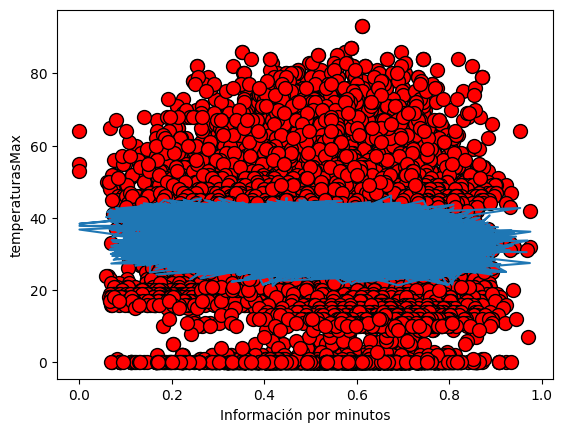

In [154]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')